# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

## Part 0: Get to Know the Data

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

In [4]:
# load in the data
#azdias = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')
azdias = pd.read_csv('arvato_data/Udacity_AZDIAS_052018.csv', sep=';')
customers = pd.read_csv('arvato_data/Udacity_CUSTOMERS_052018.csv', sep=';')

/Users/maurizio/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Looks we had some trouble while importing already...

In [18]:
azdias.iloc[:,17:20].head()

,CAMEO_DEU_2015,CAMEO_DEUG_2015,CAMEO_INTL_2015
0,NaN,NaN,NaN
1,8A,8,51
2,4C,4,24
3,2A,2,12
4,6B,6,43


In [19]:
azdias.CAMEO_DEU_2015.value_counts()

6B    56672
8A    52438
4C    47819
2D    35074
3C    34769
7A    34399
3D    34307
8B    33434
4A    33155
8C    30993
9D    28593
9B    27676
9C    24987
7B    24503
9A    20542
2C    19422
8D    17576
6E    16107
2B    15486
5D    14943
6C    14820
2A    13249
5A    12214
1D    11909
1A    10850
3A    10543
5B    10354
5C     9935
7C     9065
4B     9047
4D     8570
3B     7160
6A     6810
9E     6379
6D     6073
6F     5392
7D     5333
4E     5321
1E     5065
7E     4633
1C     4317
5F     4283
1B     4071
5E     3581
XX      373
Name: CAMEO_DEU_2015, dtype: int64

In [6]:
azdias.CAMEO_DEUG_2015.value_counts()

8      78023
9      62578
6      61253
4      60185
8.0    56418
3      50360
2      48276
9.0    45599
7      45021
6.0    44621
4.0    43727
3.0    36419
2.0    34955
7.0    32912
5      32292
5.0    23018
1      20997
1.0    15215
X        373
Name: CAMEO_DEUG_2015, dtype: int64

In [11]:
azdias.CAMEO_INTL_2015.value_counts()

51      77576
51.0    56118
41      53459
24      52882
41.0    38877
24.0    38276
14      36524
43      32730
14.0    26360
54      26207
43.0    23942
25      22837
54.0    19184
22      19173
25.0    16791
23      15653
13      15272
45      15206
22.0    13982
55      13842
52      11836
23.0    11097
13.0    11064
31      11041
45.0    10926
34      10737
55.0    10113
15       9832
52.0     8706
44       8543
31.0     7983
34.0     7787
12       7645
15.0     7142
44.0     6277
35       6090
32       6067
33       5833
12.0     5604
32.0     4287
35.0     4266
33.0     4102
XX        373
Name: CAMEO_INTL_2015, dtype: int64

So the values X and XX in these two tables are to be considered "unknown" and converted to null. So in our initial cleaning we will check the values of the documented features against the documentation ( the "DIAS Attributes - Values 2017.xlsx" file) and consider the ones that fall outside the reanges priveded as null.


In [14]:
#azdias.to_feather('azdias.feather')
#customers.to_feather('customers.feather')

In [203]:
# Reading the features description excel file into a Dataframe
feat_info = pd.read_excel('DIAS Attributes - Values 2017.xlsx', sheetname='Tabelle1', index_col=[0, 1, 2]).reset_index()
feat_info.drop('level_0', axis=1, inplace=True)
feat_info[feat_info.Attribute=='CAMEO_DEUG_2015']

/Users/maurizio/anaconda3/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Attribute,Description,Value,Meaning
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown
52,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,1,upper class
53,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,2,upper middleclass
54,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,3,established middleclasse
55,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,4,consumption-oriented middleclass
56,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,5,active middleclass
57,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,6,low-consumption middleclass
58,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,7,lower middleclass
59,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,8,working class
60,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,9,urban working class


In [156]:
# Turns out the feat_info dataset from the Excel spreadsheet has some columns that are not in the population dataset
# and vicecersa, Let's explore a bit
# These one are in the population and are described in the spreadsheet
attributes_we_have_info_about = np.intersect1d(feat_info.Attribute.unique(), np.array(azdias.columns))
# These one are in the population and are NOT described in the spreadsheet
attributes_we_dont_have_info = np.setdiff1d(np.array(azdias.columns), feat_info.Attribute.unique())
# These one are in the spreadsheet and are NOT in the population so we just ignore them for now
attributes_we_dont_care = np.setdiff1d(feat_info.Attribute.unique(), np.array(azdias.columns))

len(attributes_we_have_info_about), len(attributes_we_dont_have_info), len(attributes_we_dont_care)

(270, 96, 42)

So we will start handling the features that are documented for now and run some cleaning scripts, then we will explore the undocumented ones and decide what to do with them.

In [204]:
# Check values for a random feature
# split a string is a string otherwise return unchanged
def split_if_string(x):
    if isinstance(x, str):
        return x.split(',')
    else:
        return x
# Change ints into floats in a list and leave anything else unchanged
def to_float(x):
    try:
        x = float(x)
    except:
        pass
    return x

In [217]:
# The numerical features need to be handled separately, as there are some 0s
numerical_features = ['ANZ_HAUSHALTE_AKTIV', 'GEBURTSJAHR', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL',
                     'KBA13_ANZAHL_PKW', 'MIN_GEBAEUDEJAHR']
# ANZ_HAUSHALTE_AKTIV: Number of households in the building, 6463 data points have value=0, we keep them
# GEBURTSJAHR: Year of birth: 0 is to be considered null
# ANZ_HH_TITEL: number of academic title holder in building: 0 is acceptable, but there are 770244 data points with zero, we set them to null
# ANZ_PERSONEN: number of adult persons in the household: 0 not acceptable and there are 34103 with this value (we put null)
# ANZ_TITEL: number of professional title holder in household: 0 is acceptabl, 814542 data points have zero, we set them to null
# KBA13_ANZAHL_PKW: number of cars in the PLZ8 => 0 is ok
# MIN_GEBAEUDEJAHR: year the building was first mentioned in our database => 0 is null

def fix_numerical_features(df):
    df.loc[azdias['GEBURTSJAHR']==0, 'GEBURTSJAHR'] = np.nan
    df.loc[azdias['MIN_GEBAEUDEJAHR']==0, 'MIN_GEBAEUDEJAHR'] = np.nan
    df.loc[azdias['ANZ_PERSONEN']==0, 'ANZ_PERSONEN'] = np.nan
    df.loc[azdias['ANZ_TITEL']==0, 'ANZ_TITEL'] = np.nan
    df.loc[azdias['ANZ_HH_TITEL']==0, 'ANZ_HH_TITEL'] = np.nan
    return df


In [218]:
# Now we will look for undocumented null features
# Year of birth has null value 0

attributes_to_check = np.setdiff1d(attributes_we_have_info_about, numerical_features)

# Better align values first as it is taking as different int and floats

def check_all_values(df, feat_info):
    for attribute in attributes_to_check:
        theoretical_vals = feat_info[feat_info.Attribute == attribute].Value.apply(lambda x: split_if_string(x)).values
        theoretical_vals = np.hstack(theoretical_vals)
        theoretical_vals = [to_float(x) for x in theoretical_vals]
        actual_values = df.loc[:, attribute].value_counts().index.values
        actual_values = [to_float(x) for x in actual_values]
        diff = set(actual_values) - set(theoretical_vals)
        if diff != set():
            print('Attribute {} has undocumented values {}'.format(attribute, diff))

check_all_values(azdias, feat_info)

Attribute CAMEO_DEUG_2015 has undocumented values {'X'}
Attribute CAMEO_DEU_2015 has undocumented values {'XX'}
Attribute KBA05_MODTEMP has undocumented values {6.0}
Attribute LP_FAMILIE_FEIN has undocumented values {0.0}
Attribute LP_FAMILIE_GROB has undocumented values {0.0}
Attribute LP_LEBENSPHASE_FEIN has undocumented values {0.0}
Attribute LP_LEBENSPHASE_GROB has undocumented values {0.0}
Attribute ORTSGR_KLS9 has undocumented values {0.0}


So here we have:

CAMEO_DEUG_2015: CAMEO classification 2015 - Uppergroup => X is null

CAMEO_DEU_2015: most common building-type within the cell => XX is a null

KBA05_MODTEMP: development of the most common car segment in the neighbourhood: we keep 6.0 although it's not documented

LP_FAMILIE_FEIN: familytyp fine: 0 is a null, must be between 1 to 11

LP_FAMILIE_GROB familytyp rough, must be 1 to 11, so 0 is a null

LP_LEBENSPHASE_FEIN: lifestage fine, must be 1 to 40, so 0 is a null

LP_LEBENSPHASE_GROB: lifestage rough, must be 1 to 12, so 0 is  a null

ORTSGR_KLS9: size of the community, 1 to 9, so 0 is a null


Now we know which columns contain values that are unknown when the "Meaning" in the dataframe has the value "unknown".
We leave the features that have a value equal to zero with Meaning "no transaction known"as they represent transactional activity over a period, so we interpret is as "zero transactions".
Then there is an additional group of features 'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'ANZ_PERSONEN', 'ANZ_TITEL' that are must be analyzed separately as a zero value is equal to null for some of them.


In [220]:
def fix_undocumented_nulls(df):
    df.loc[azdias['CAMEO_DEUG_2015']=='X', 'CAMEO_DEUG_2015'] = np.nan
    df.loc[azdias['CAMEO_DEU_2015']=='XX', 'CAMEO_DEU_2015'] = np.nan
    df.loc[azdias['LP_FAMILIE_FEIN']==0, 'LP_FAMILIE_FEIN'] = np.nan
    df.loc[azdias['LP_FAMILIE_GROB']==0, 'LP_FAMILIE_FEIN'] = np.nan
    df.loc[azdias['LP_LEBENSPHASE_FEIN']==0, 'LP_LEBENSPHASE_FEIN'] = np.nan
    df.loc[azdias['LP_LEBENSPHASE_GROB']==0, 'LP_LEBENSPHASE_GROB'] = np.nan
    df.loc[azdias['ORTSGR_KLS9']==0, 'ORTSGR_KLS9'] = np.nan
    
    return df
azdias = fix_undocumented_nulls(azdias)
    

In [231]:
feat_info[(feat_info.Attribute.isin(attributes_to_check)) & (feat_info.Meaning == 'unknown')].head()

,Attribute,Description,Value,Meaning
0,AGER_TYP,best-ager typology,-1,unknown
5,ALTERSKATEGORIE_GROB,age classification through prename analysis,"-1, 0",unknown
33,ANREDE_KZ,gender,"-1, 0",unknown
40,BALLRAUM,distance to next urban centre,-1,unknown
51,CAMEO_DEUG_2015,CAMEO classification 2015 - Uppergroup,-1,unknown


In [227]:

#import time
#start = time.time()
#df = azdias.copy()
print(df.AGER_TYP.value_counts())
#for _, row in unknown_df.iterrows():
#    if isinstance(row.Value, str):
#        for unknown_value in row.Value.split(','):
#            df.loc[df[row.Attribute] == float(unknown_value), row.Attribute] = np.nan
#    else:
#        df.loc[df[row.Attribute] == row.Value, row.Attribute] = np.nan
#print("elapsed time ", time.time() - start)        
        
#print(df.AGER_TYP.value_counts())       
azdias.dtypes['AGER_TYP']

-1    677503
 2     98472
 1     79802
 3     27104
 0      8340
Name: AGER_TYP, dtype: int64


dtype('int64')

In [ ]:
# Now we can convert the documented missing Value Codes to NaNs. Not all columns in the population dataset are included in the informational spreadsheets
# This will take a while for the population dataset

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False
    

def convert_unknown(df, unknown_values_df):
    
    df_cleansed = df.copy()
    
    for _, row in unknown_values_df.iterrows():
        if isinstance(row.Value, str):
            for unknown_value in row.Value.split(','):
                df_cleansed.loc[df_cleansed[row.Attribute] == float(unknown_value), row.Attribute] = np.nan
        else:
            df_cleansed.loc[df_cleansed[row.Attribute] == row.Value, row.Attribute] = np.nan
                
    return df_cleansed


df_conv = convert_unknown(azdias, feat_info[(feat_info.Attribute.isin(attributes_to_check)) & (feat_info.Meaning == 'unknown')])

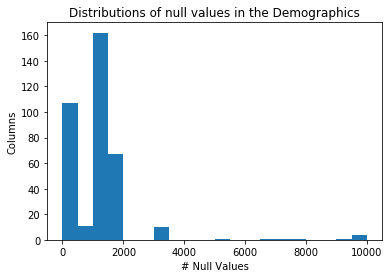

In [156]:
# Assess missing data in columns
plt.hist(df_conv.isnull().sum(), bins=20)
plt.title('Distributions of null values in the Demographics')
plt.xlabel('# Null Values')
plt.ylabel('Columns');

## Part 1: Customer Segmentation Report

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Part 2: Supervised Learning Model

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [ ]:
mailout_train = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

## Part 3: Kaggle Competition

Now that you've created a model to predict which individuals are most likely to respond to a mailout campaign, it's time to test that model in competition through Kaggle. If you click on the link [here](http://www.kaggle.com/t/21e6d45d4c574c7fa2d868f0e8c83140), you'll be taken to the competition page where, if you have a Kaggle account, you can enter. If you're one of the top performers, you may have the chance to be contacted by a hiring manager from Arvato or Bertelsmann for an interview!

Your entry to the competition should be a CSV file with two columns. The first column should be a copy of "LNR", which acts as an ID number for each individual in the "TEST" partition. The second column, "RESPONSE", should be some measure of how likely each individual became a customer – this might not be a straightforward probability. As you should have found in Part 2, there is a large output class imbalance, where most individuals did not respond to the mailout. Thus, predicting individual classes and using accuracy does not seem to be an appropriate performance evaluation method. Instead, the competition will be using AUC to evaluate performance. The exact values of the "RESPONSE" column do not matter as much: only that the higher values try to capture as many of the actual customers as possible, early in the ROC curve sweep.

In [ ]:
mailout_test = pd.read_csv('../../data/Term2/capstone/arvato_data/Udacity_MAILOUT_052018_TEST.csv', sep=';')